# Identification de gaz toxiques : analyse et visualisation des données

In [12]:
from eda_utils import *
import os
from data_preprocessing import preprocess_data, preprocess_data_2, remove_outliers_iqr

In [2]:
data_dir = "./data/"

In [3]:
train_x_path = os.path.join(data_dir, "x_train_T9QMMVq.csv")
train_y_path = os.path.join(data_dir, "y_train_R0MqWmu.csv")
test_x_path = os.path.join(data_dir, "x_test_9F13O5s.csv")

In [4]:
train_features = load_csv_data(train_x_path)
train_labels = load_csv_data(train_y_path)
test_features = load_csv_data(test_x_path)

In [5]:
print("Train Features:")
basic_info(train_features)

print("\nTrain Labels:")
basic_info(train_labels)

Train Features:
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202933 entries, 0 to 202932
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        202933 non-null  int64  
 1   Humidity  202933 non-null  float64
 2   M12       202933 non-null  float64
 3   M13       202933 non-null  float64
 4   M14       202933 non-null  float64
 5   M15       202933 non-null  float64
 6   M4        202933 non-null  float64
 7   M5        202933 non-null  float64
 8   M6        202933 non-null  float64
 9   M7        202933 non-null  float64
 10  R         202933 non-null  float64
 11  S1        202933 non-null  float64
 12  S2        202933 non-null  float64
 13  S3        202933 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 21.7 MB

DataFrame Head:
   ID  Humidity       M12       M13       M14       M15        M4        M5  \
0   0  0.098160 -0.175981 -0.086469 -0.041465 -0.021153  0.197597  0.

In [6]:
print("\nDescriptive statistics for train features:")
print(descriptive_stats(train_features.drop("ID", axis=1)))

print("\nDescriptive statistics for train labels:")
print(descriptive_stats(train_labels).drop("ID", axis=1))


Descriptive statistics for train features:
            Humidity            M12            M13            M14  \
count  202933.000000  202933.000000  202933.000000  202933.000000   
mean        0.225423      -0.298982      -0.249076      -0.155972   
std         0.335276       1.421943       1.246752       0.848411   
min         0.000305     -13.021540     -11.844691      -9.117980   
25%         0.000379      -0.288159      -0.179096      -0.087792   
50%         0.090586      -0.000912       0.018658       0.019633   
75%         0.328115       0.209746       0.177158       0.120979   
max         0.958255       2.545019       2.864641       2.004906   

                 M15             M4             M5             M6  \
count  202933.000000  202933.000000  202933.000000  202933.000000   
mean       -0.048803       0.891061       0.454768       0.175309   
std         0.361638       2.433388       1.578226       0.815405   
min        -4.165993      -2.831466      -0.790972      -0

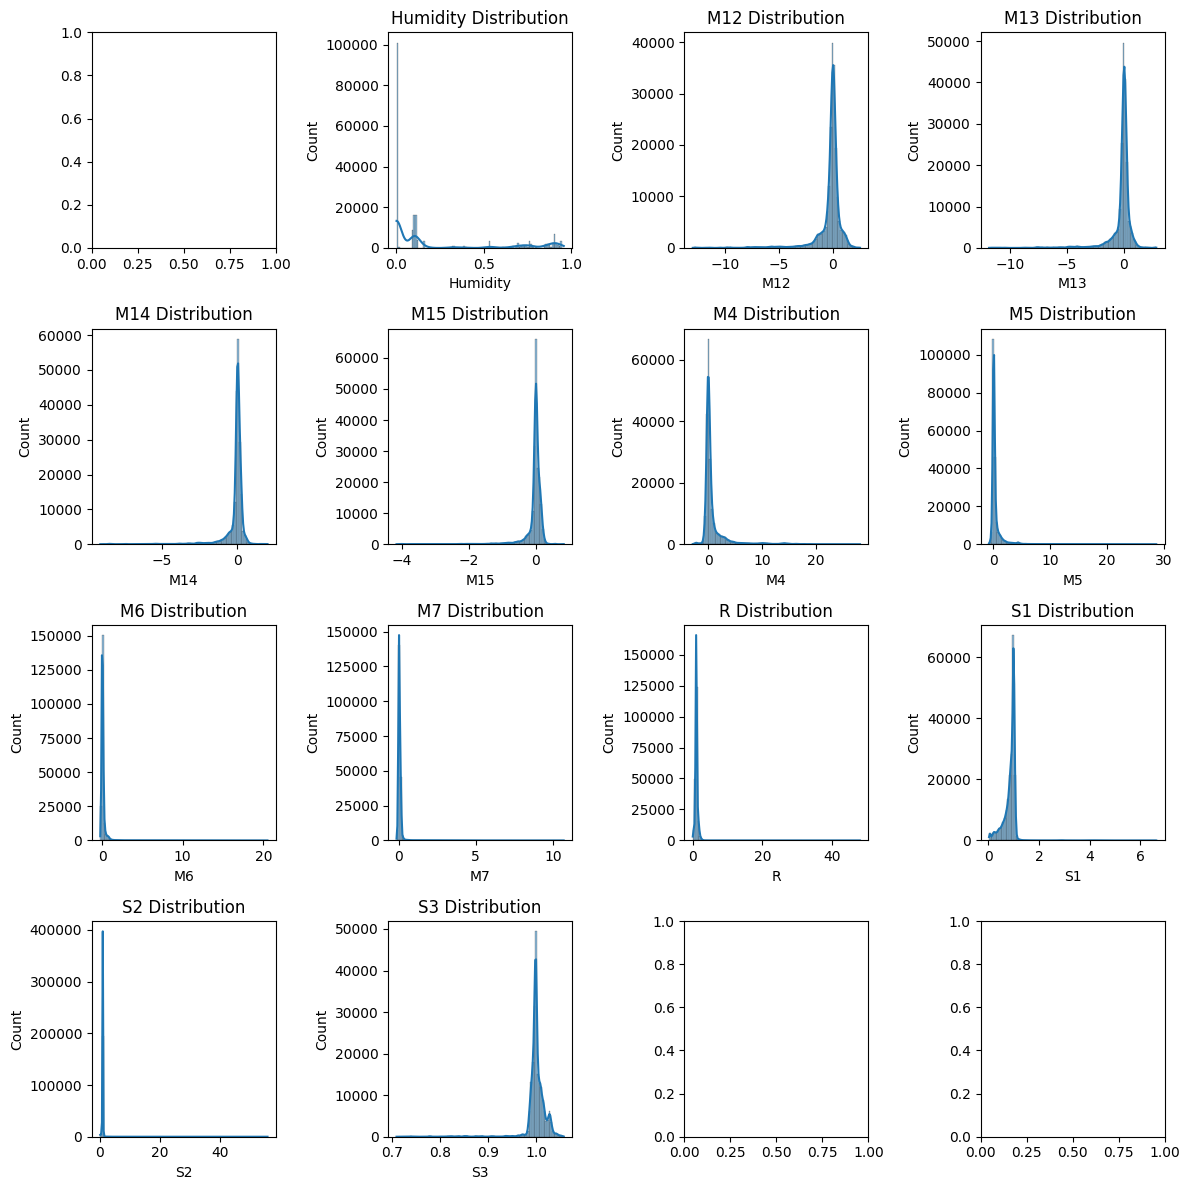

In [7]:
plot_feature_distributions(train_features, bins=100)

In [8]:
_ = find_value_intervals(train_features, 0.99, True)

99% of the ID values are in the interval [1014.66, 201917.34]
Min: 0.00, Max: 202932.00
99% of the Humidity values are in the interval [0.00, 0.95]
Min: 0.00, Max: 0.96
99% of the M12 values are in the interval [-9.35, 1.66]
Min: -13.02, Max: 2.55
99% of the M13 values are in the interval [-7.92, 1.35]
Min: -11.84, Max: 2.86
99% of the M14 values are in the interval [-5.63, 0.78]
Min: -9.12, Max: 2.00
99% of the M15 values are in the interval [-2.49, 0.30]
Min: -4.17, Max: 0.84
99% of the M4 values are in the interval [-1.83, 15.43]
Min: -2.83, Max: 28.25
99% of the M5 values are in the interval [-0.51, 12.24]
Min: -0.79, Max: 28.71
99% of the M6 values are in the interval [-0.12, 5.98]
Min: -0.22, Max: 20.51
99% of the M7 values are in the interval [-0.09, 2.56]
Min: -0.15, Max: 10.71
99% of the R values are in the interval [0.16, 6.21]
Min: 0.02, Max: 48.03
99% of the S1 values are in the interval [0.06, 1.69]
Min: 0.03, Max: 6.63
99% of the S2 values are in the interval [0.22, 2.40]

<Figure size 1000x600 with 0 Axes>

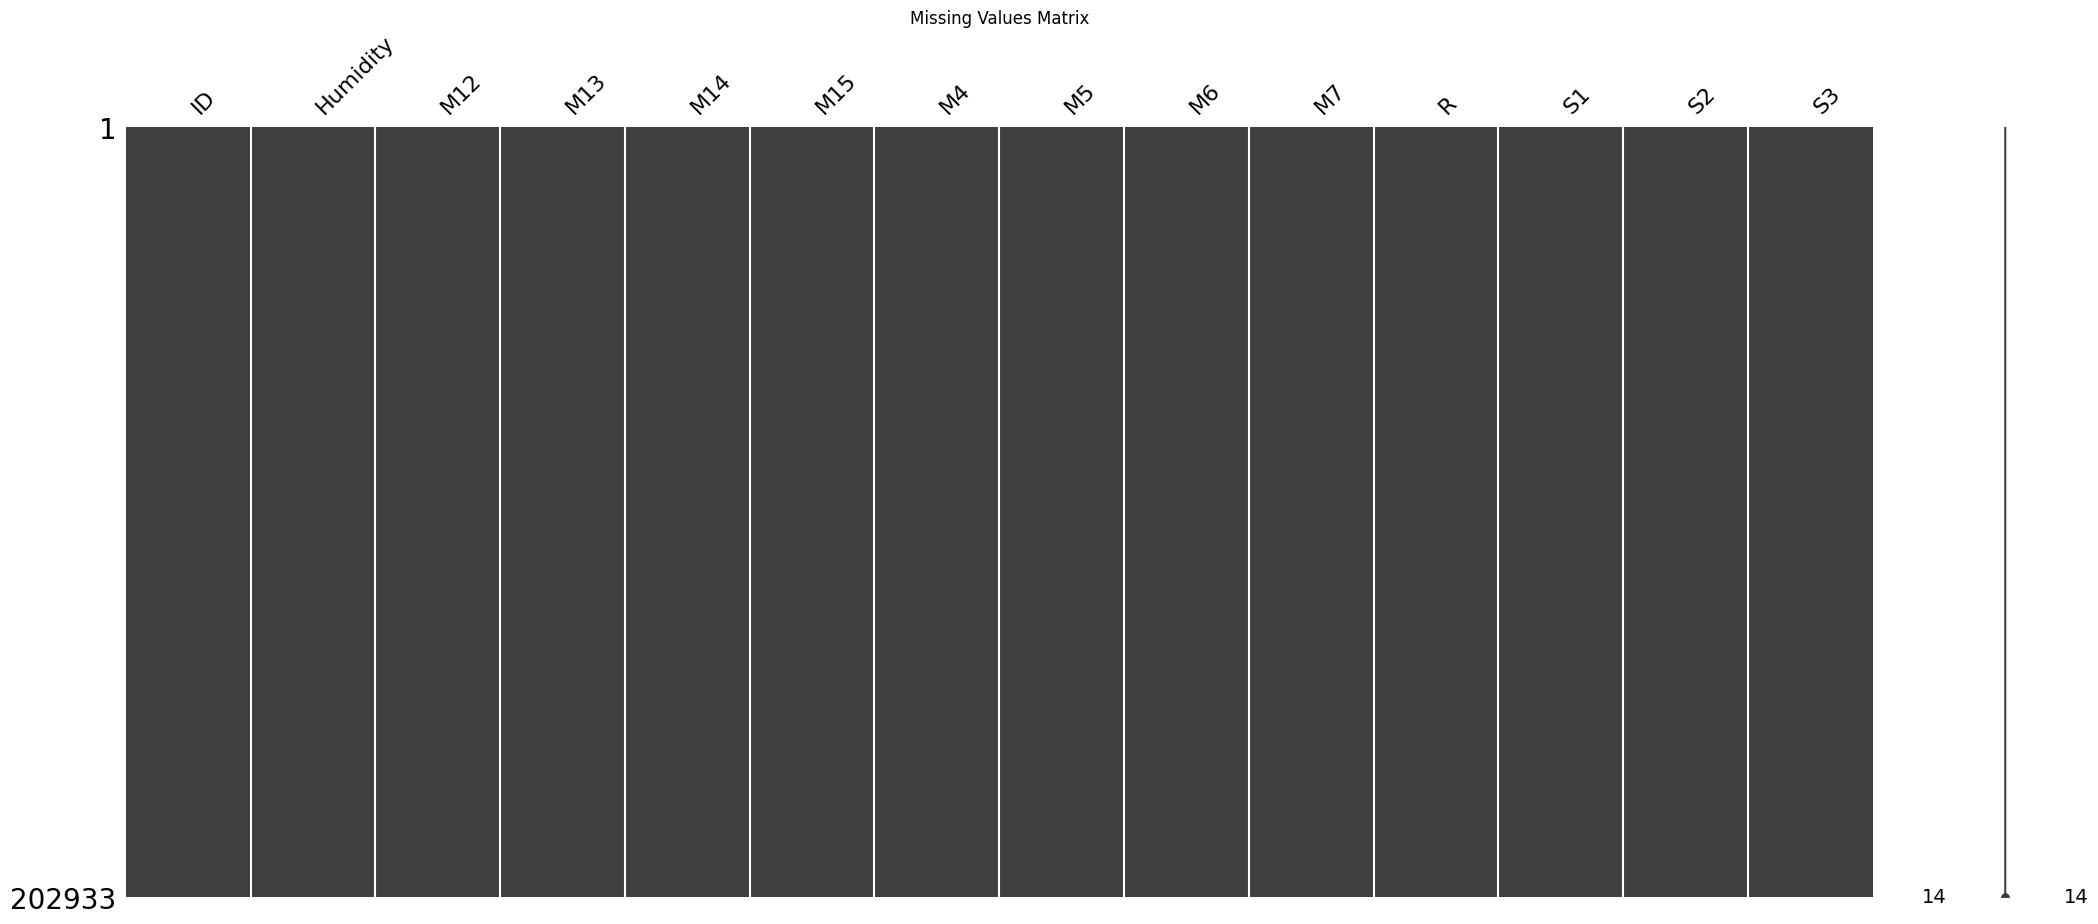

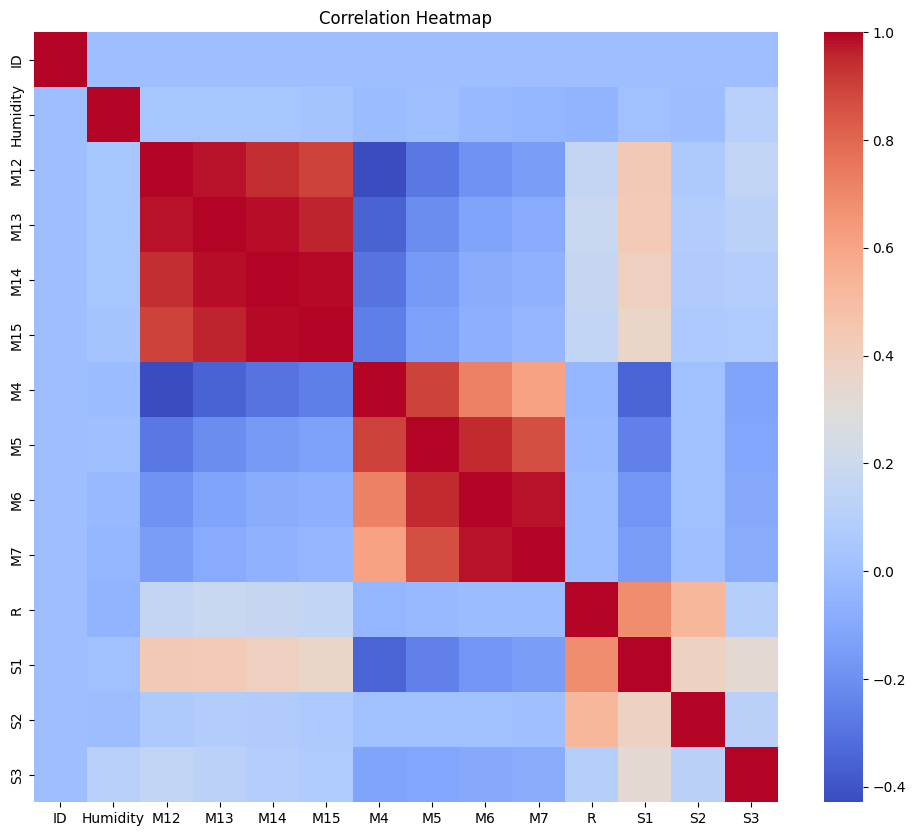

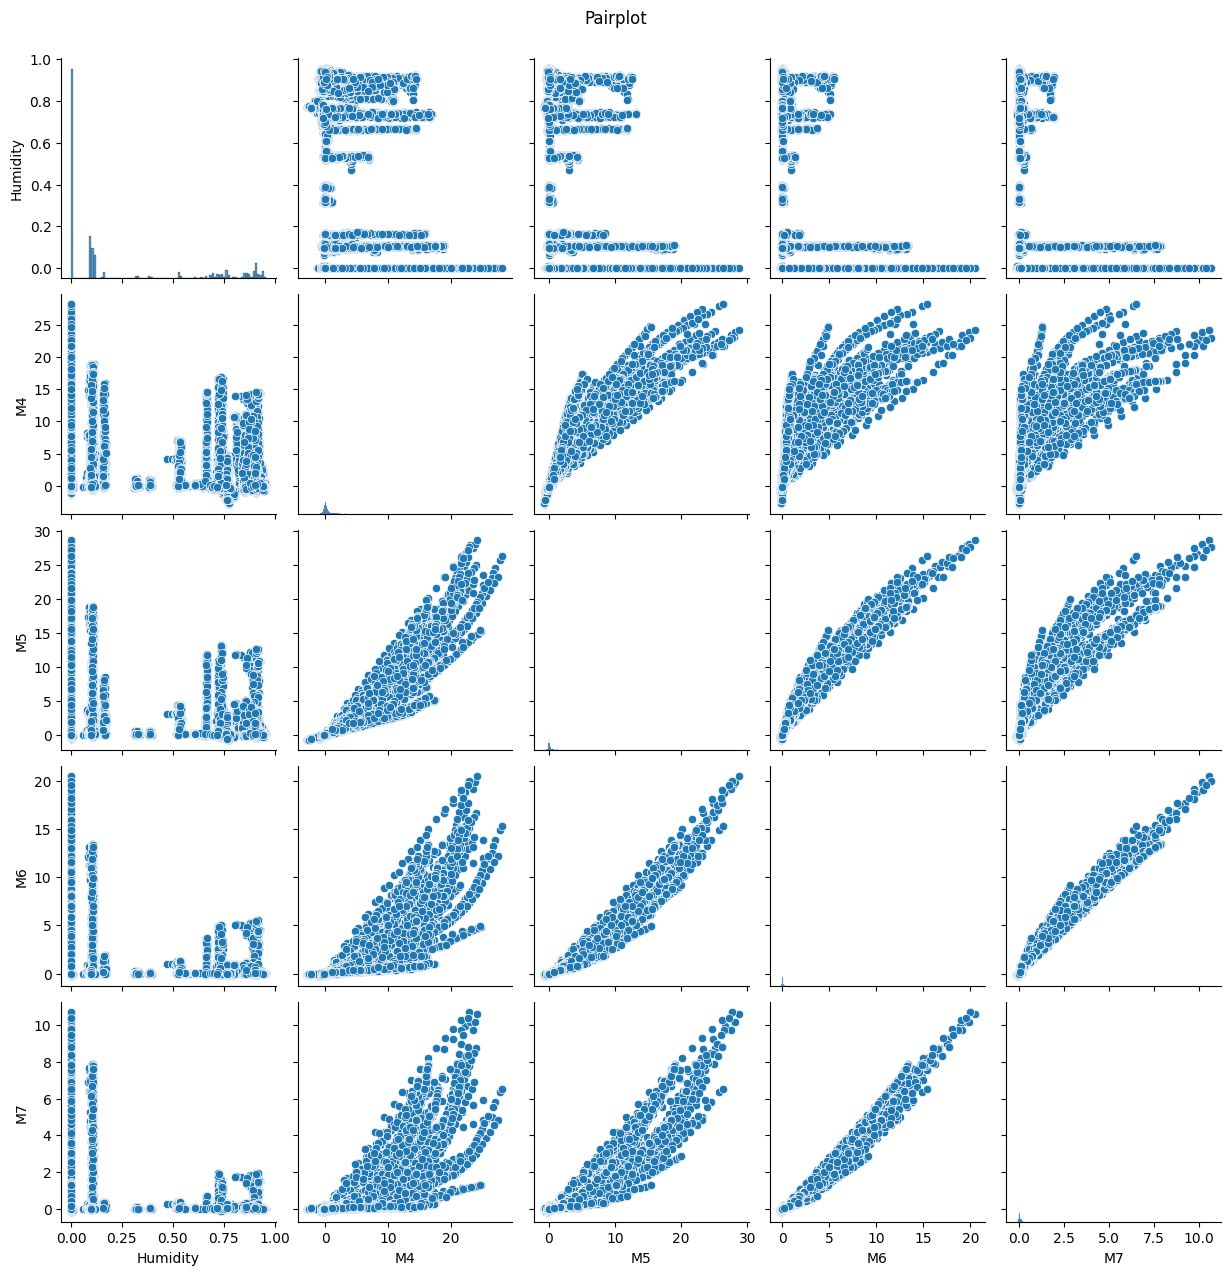

/Users/kiki/.pyenv/versions/3.12.2/envs/idgaz/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/kiki/.pyenv/versions/3.12.2/envs/idgaz/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


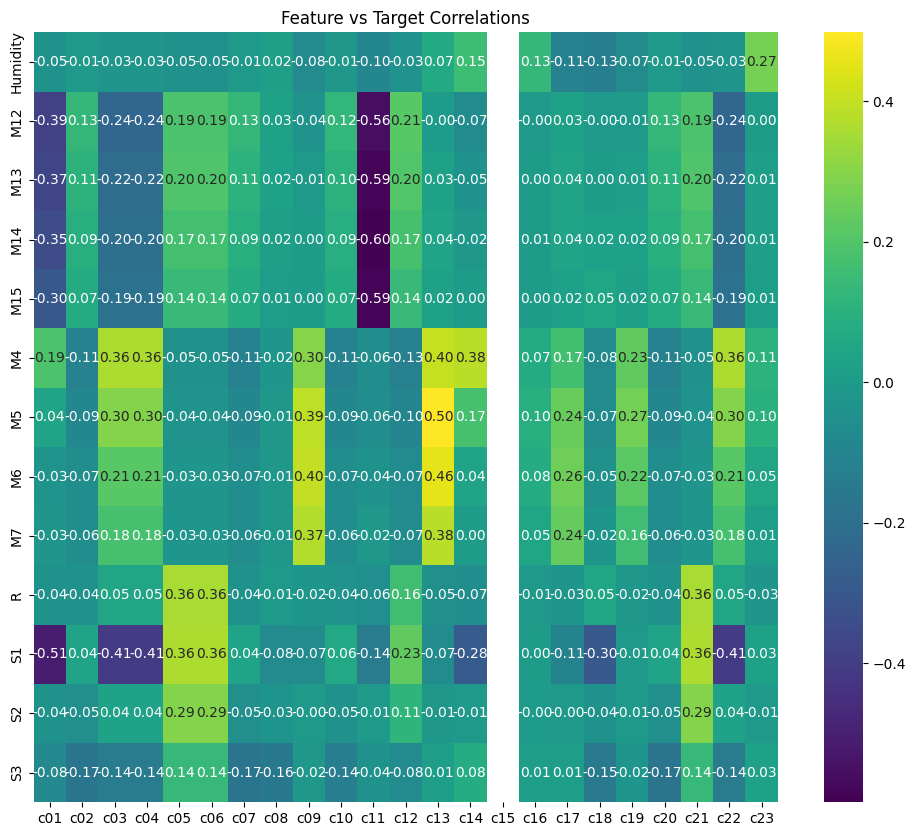


Correlation matrix between features and targets:
               c01       c02       c03       c04       c05       c06  \
Humidity -0.045271 -0.008894 -0.028501 -0.028501 -0.048912 -0.048912   
M12      -0.385054  0.126657 -0.237372 -0.237372  0.186890  0.186890   
M13      -0.373449  0.105453 -0.215541 -0.215541  0.195867  0.195867   
M14      -0.348206  0.091762 -0.202891 -0.202891  0.171521  0.171521   
M15      -0.301532  0.073092 -0.189124 -0.189124  0.142126  0.142126   
M4        0.185801 -0.114158  0.364615  0.364615 -0.046447 -0.046447   
M5        0.039104 -0.091790  0.296891  0.296891 -0.035884 -0.035884   
M6       -0.032396 -0.067010  0.214354  0.214354 -0.026661 -0.026661   
M7       -0.025173 -0.063234  0.175034  0.175034 -0.026445 -0.026445   
R        -0.041780 -0.037373  0.047114  0.047114  0.355543  0.355543   
S1       -0.511916  0.036485 -0.406016 -0.406016  0.362024  0.362024   
S2       -0.042928 -0.053530  0.035355  0.035355  0.293463  0.293463   
S3       -0.08

In [9]:
plot_missing_values(train_features)

corr = plot_correlations(train_features, annot=False)

subset_features = ["Humidity", "M4", "M5", "M6", "M7"]
plot_pairplot(train_features, features=subset_features)

# Analyze correlations between features and target labels
corr_df = plot_feature_target_correlations(train_features, train_labels)
print("\nCorrelation matrix between features and targets:")
print(corr_df)

In [10]:
print(train_features.corr())

                ID  Humidity       M12       M13       M14       M15  \
ID        1.000000 -0.000562  0.000076  0.000312  0.000561  0.000635   
Humidity -0.000562  1.000000  0.036553  0.037870  0.036680  0.024513   
M12       0.000076  0.036553  1.000000  0.979845  0.941479  0.895304   
M13       0.000312  0.037870  0.979845  1.000000  0.987799  0.958117   
M14       0.000561  0.036680  0.941479  0.987799  1.000000  0.988976   
M15       0.000635  0.024513  0.895304  0.958117  0.988976  1.000000   
M4        0.000259 -0.015373 -0.428646 -0.352694 -0.295029 -0.260557   
M5       -0.001533  0.002331 -0.282045 -0.208292 -0.160167 -0.138021   
M6       -0.002573 -0.024304 -0.185299 -0.121686 -0.083457 -0.067231   
M7       -0.003113 -0.043575 -0.147422 -0.090935 -0.056484 -0.037571   
R        -0.002150 -0.049736  0.160480  0.182402  0.171078  0.154234   
S1       -0.002988  0.007020  0.438962  0.435239  0.401661  0.358290   
S2       -0.002977 -0.005366  0.064002  0.079503  0.074256  0.06

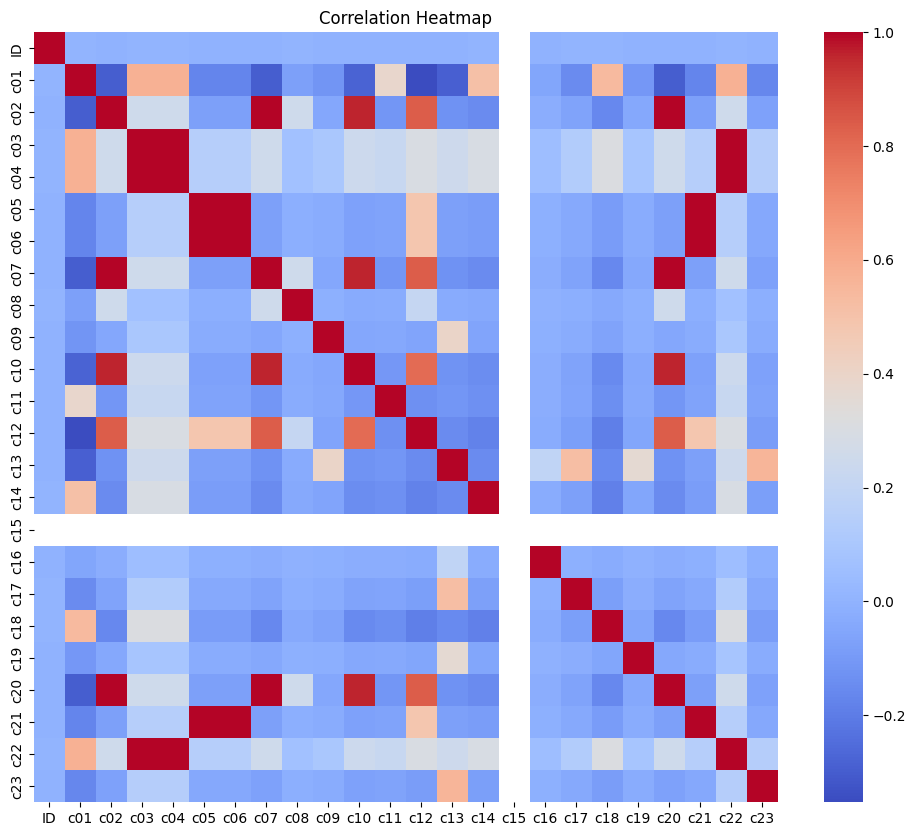

,ID,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
ID,1.000000,0.002177,0.001194,0.002111,0.002111,-0.000260,-0.000260,0.001194,0.001308,-0.001104,...,0.002835,NaN,-0.002126,0.001580,0.001346,-0.001890,0.001194,-0.000260,0.002111,-0.000778
c01,0.002177,1.000000,-0.295353,0.575877,0.575877,-0.170547,-0.170547,-0.295353,-0.072968,-0.117024,...,0.509206,NaN,-0.054429,-0.151717,0.537976,-0.105810,-0.295353,-0.170547,0.575877,-0.163182
c02,0.001194,-0.295353,1.000000,0.253390,0.253390,-0.074464,-0.074464,1.000000,0.250333,-0.051095,...,-0.150223,NaN,-0.023765,-0.066243,-0.158849,-0.046199,1.000000,-0.074464,0.253390,-0.071249
c03,0.002111,0.575877,0.253390,1.000000,1.000000,0.145487,0.145487,0.253390,0.064825,0.099388,...,0.293512,NaN,0.049111,0.128186,0.309877,0.090722,0.253390,0.145487,1.000000,0.139529
c04,0.002111,0.575877,0.253390,1.000000,1.000000,0.145487,0.145487,0.253390,0.064825,0.099388,...,0.293512,NaN,0.049111,0.128186,0.309877,0.090722,0.253390,0.145487,1.000000,0.139529
c05,-0.000260,-0.170547,-0.074464,0.145487,0.145487,1.000000,1.000000,-0.074464,-0.018397,-0.029504,...,-0.086744,NaN,-0.013723,-0.038251,-0.091725,-0.026677,-0.074464,1.000000,0.145487,-0.041141
c06,-0.000260,-0.170547,-0.074464,0.145487,0.145487,1.000000,1.000000,-0.074464,-0.018397,-0.029504,...,-0.086744,NaN,-0.013723,-0.038251,-0.091725,-0.026677,-0.074464,1.000000,0.145487,-0.041141
c07,0.001194,-0.295353,1.000000,0.253390,0.253390,-0.074464,-0.074464,1.000000,0.250333,-0.051095,...,-0.150223,NaN,-0.023765,-0.066243,-0.158849,-0.046199,1.000000,-0.074464,0.253390,-0.071249
c08,0.001308,-0.072968,0.250333,0.064825,0.064825,-0.018397,-0.018397,0.250333,1.000000,-0.012623,...,-0.037113,NaN,-0.005871,-0.016365,-0.039244,-0.011414,0.250333,-0.018397,0.064825,-0.017602
c09,-0.001104,-0.117024,-0.051095,0.099388,0.099388,-0.029504,-0.029504,-0.051095,-0.012623,1.000000,...,-0.059521,NaN,-0.009416,-0.026247,-0.062939,-0.018305,-0.051095,-0.029504,0.099388,-0.028230


In [11]:
plot_correlations(train_labels, annot=False)

## Distribution des données

- La distribution des données des capteurs M12 à M15 semble suivre une forme de distribution normale. 
- Les autres ont une distribution asymétrique, assez ressérée sauf pour l'humidité. Les données des capteurs M4 à M7 sont négatives et positives, avec une échelle différente. Celles des capteurs R et S1 à S3 sont positives, avec des échelles différentes aussi. 
- L'humidité a des valeurs assez diverses entre 0 et 1, avec un pic à zero.

Nous allons donc standardiser (soustraire la moyenne et diviser par l'écart-type) les données des capteurs M12 à M15, laisser les données d'humidité teles quelles, appliquer une transformation logarithmique avant de standardiser les données R, S1, S2 et S3, et modifier l'échelle des capteurs M4 à M7 entre -1 et 1.

|    Groupe     |	    Transformation     |
| ------------- | ------------------------ |
| M12 à M15     | StandardScaler (Z-score) |
| M4 à M7       | [-1, 1] scaler           |
| R, S1, S2, S3 | Log + StandardScaler     |
| Humidity      | Pas de transformation    |

In [5]:
x_train_scaled = preprocess_data(train_features)

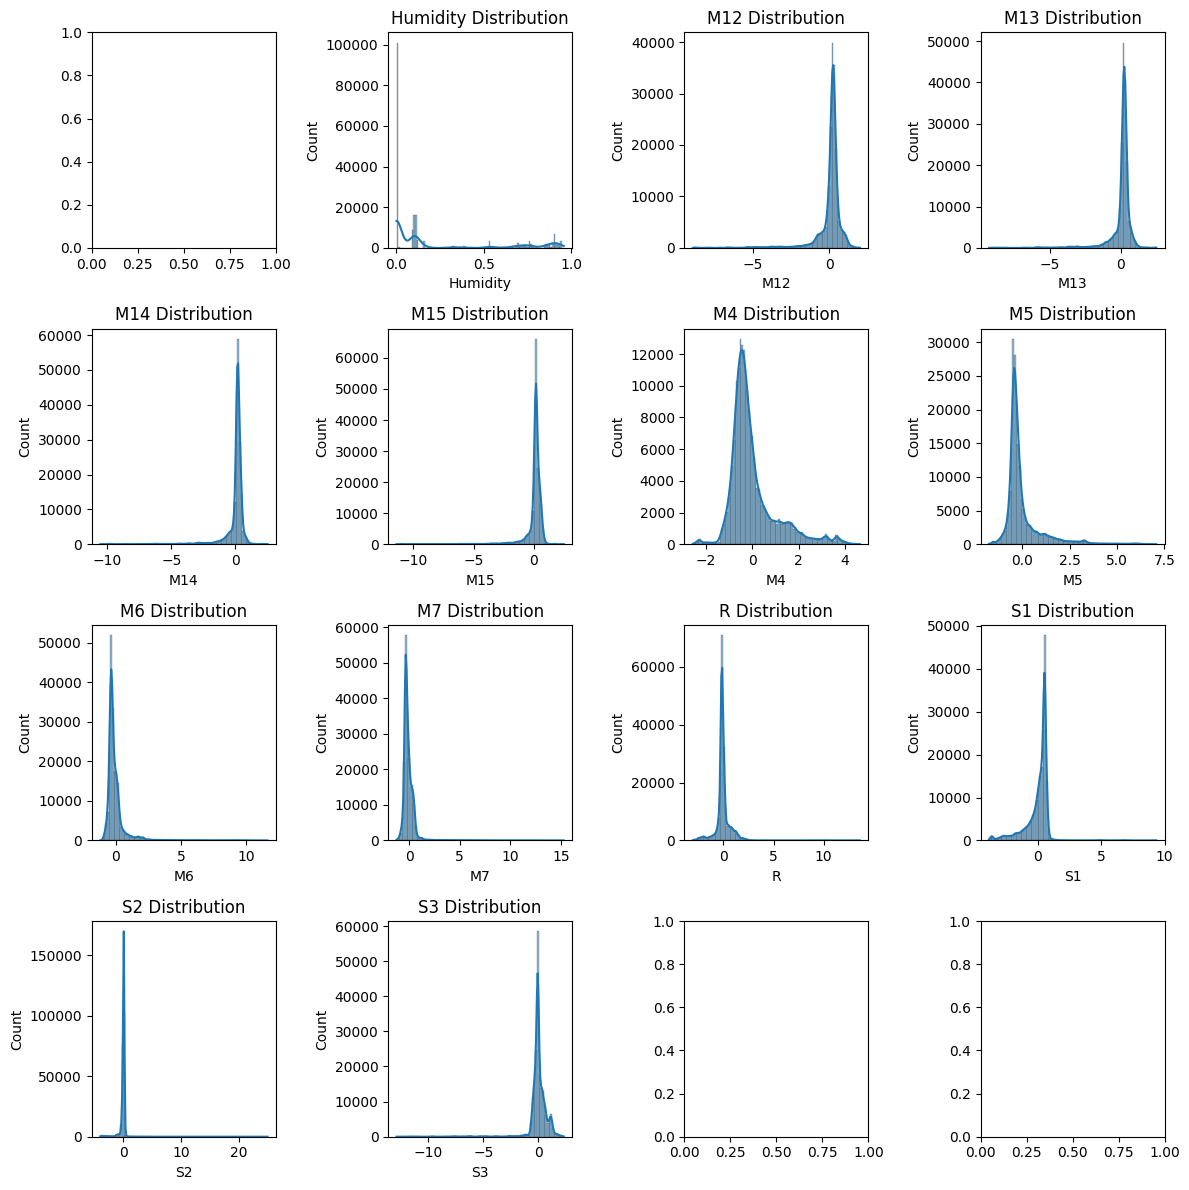

In [6]:
plot_feature_distributions(x_train_scaled, bins=100, figsize=(12, 12))

In [23]:
x_train_scaled_2 = preprocess_data_2(train_features)
x_train_scaled_2 = x_train_scaled_2[x_train_scaled_2["Humidity"] > 0.01]

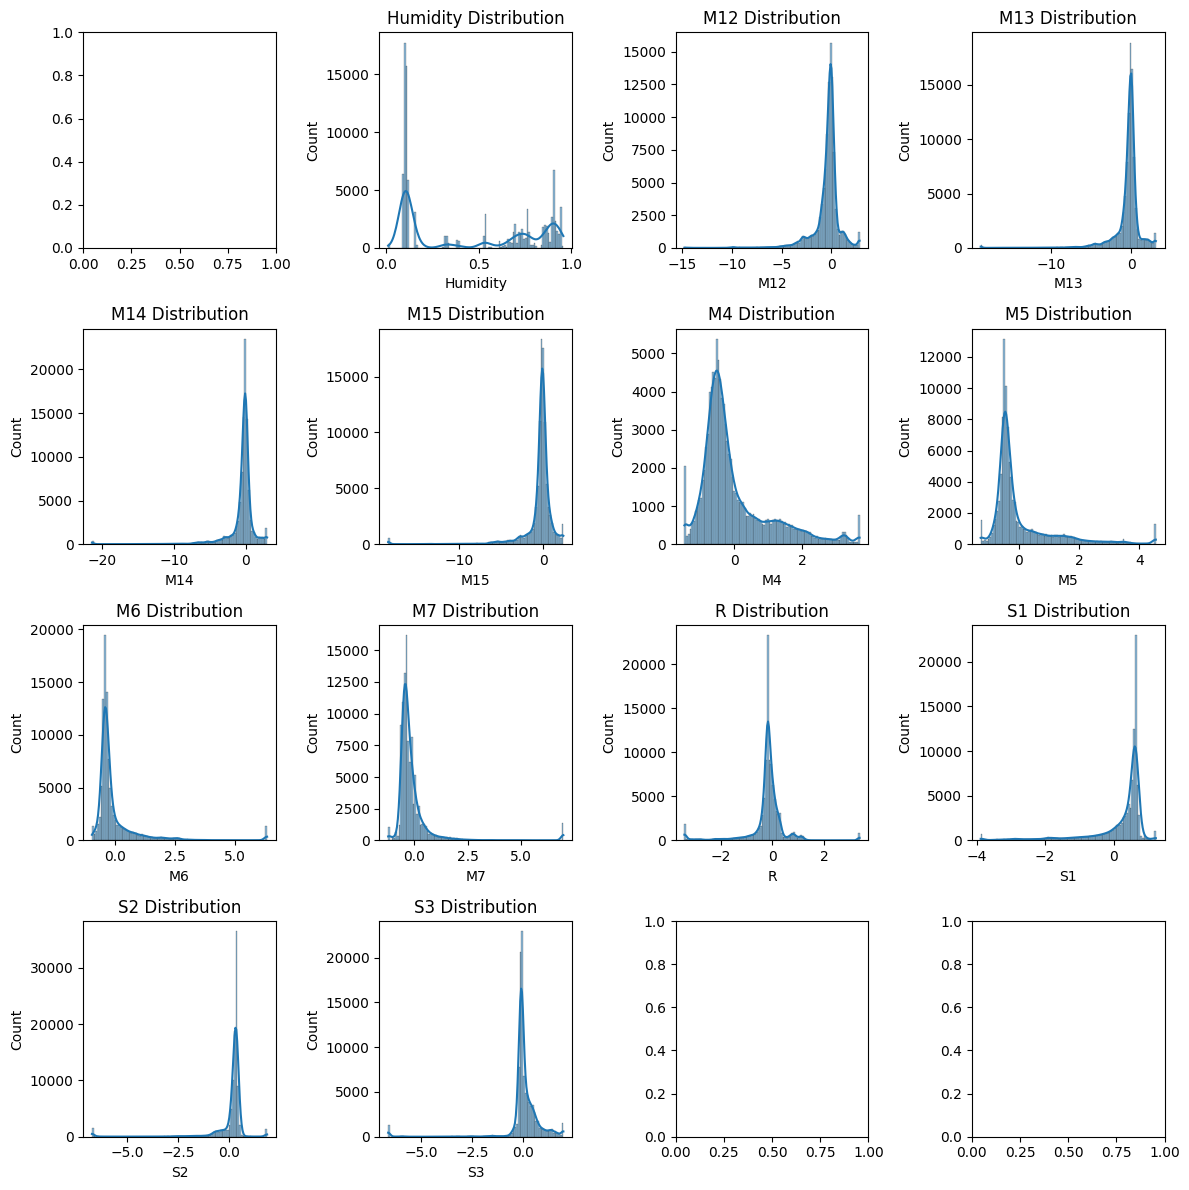

In [24]:
plot_feature_distributions(x_train_scaled_2, bins=100, figsize=(12, 12))

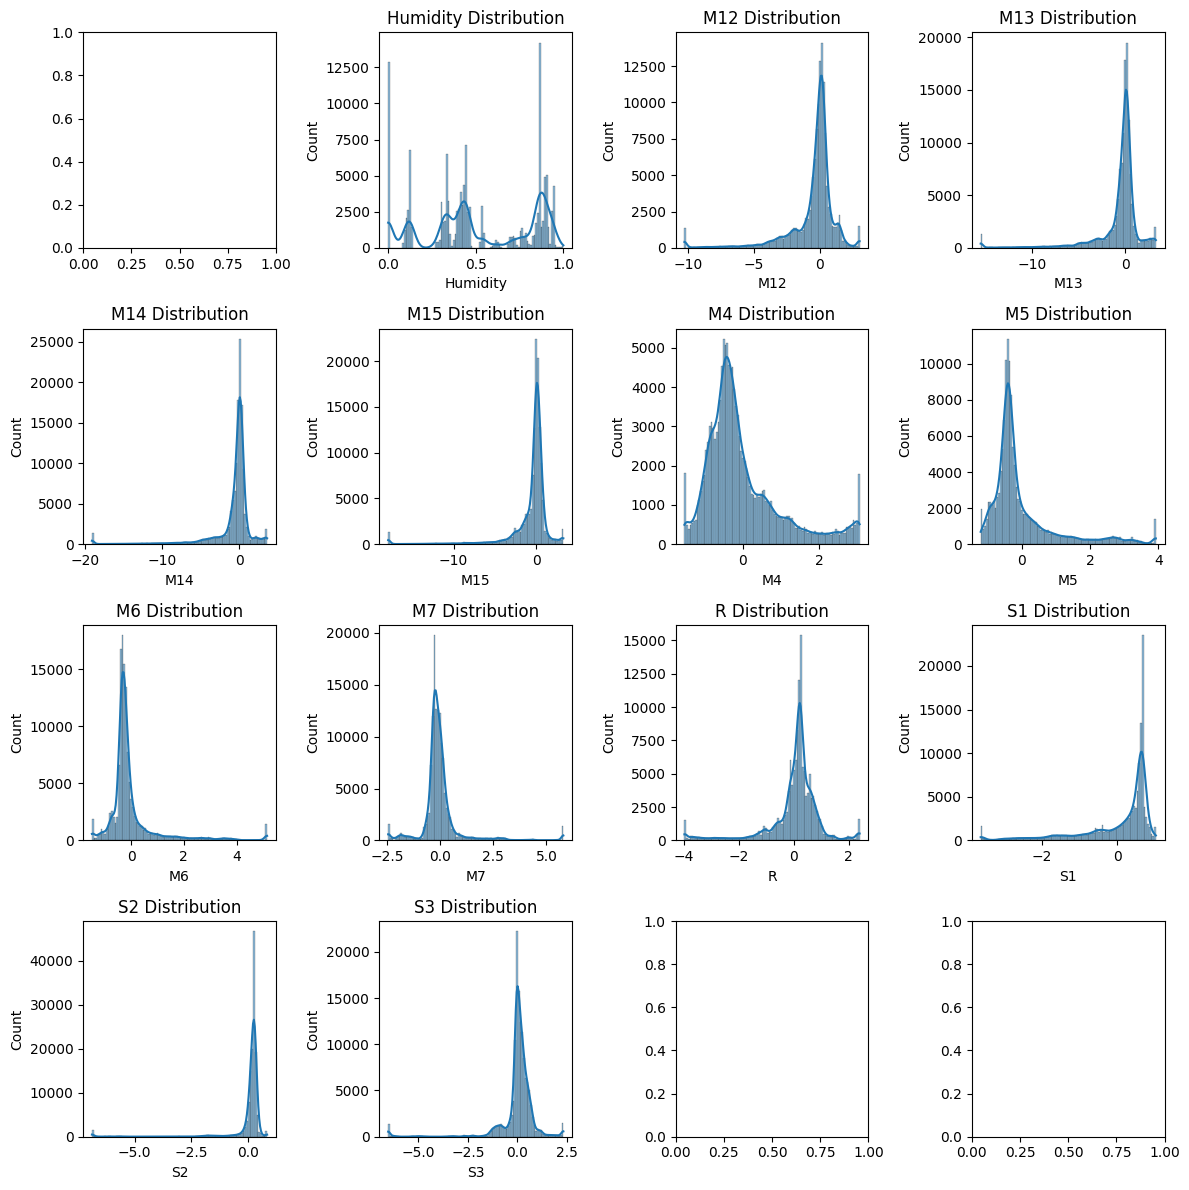

In [19]:
plot_feature_distributions(preprocess_data_2(test_features), bins=100, figsize=(12, 12))

Remove outliers

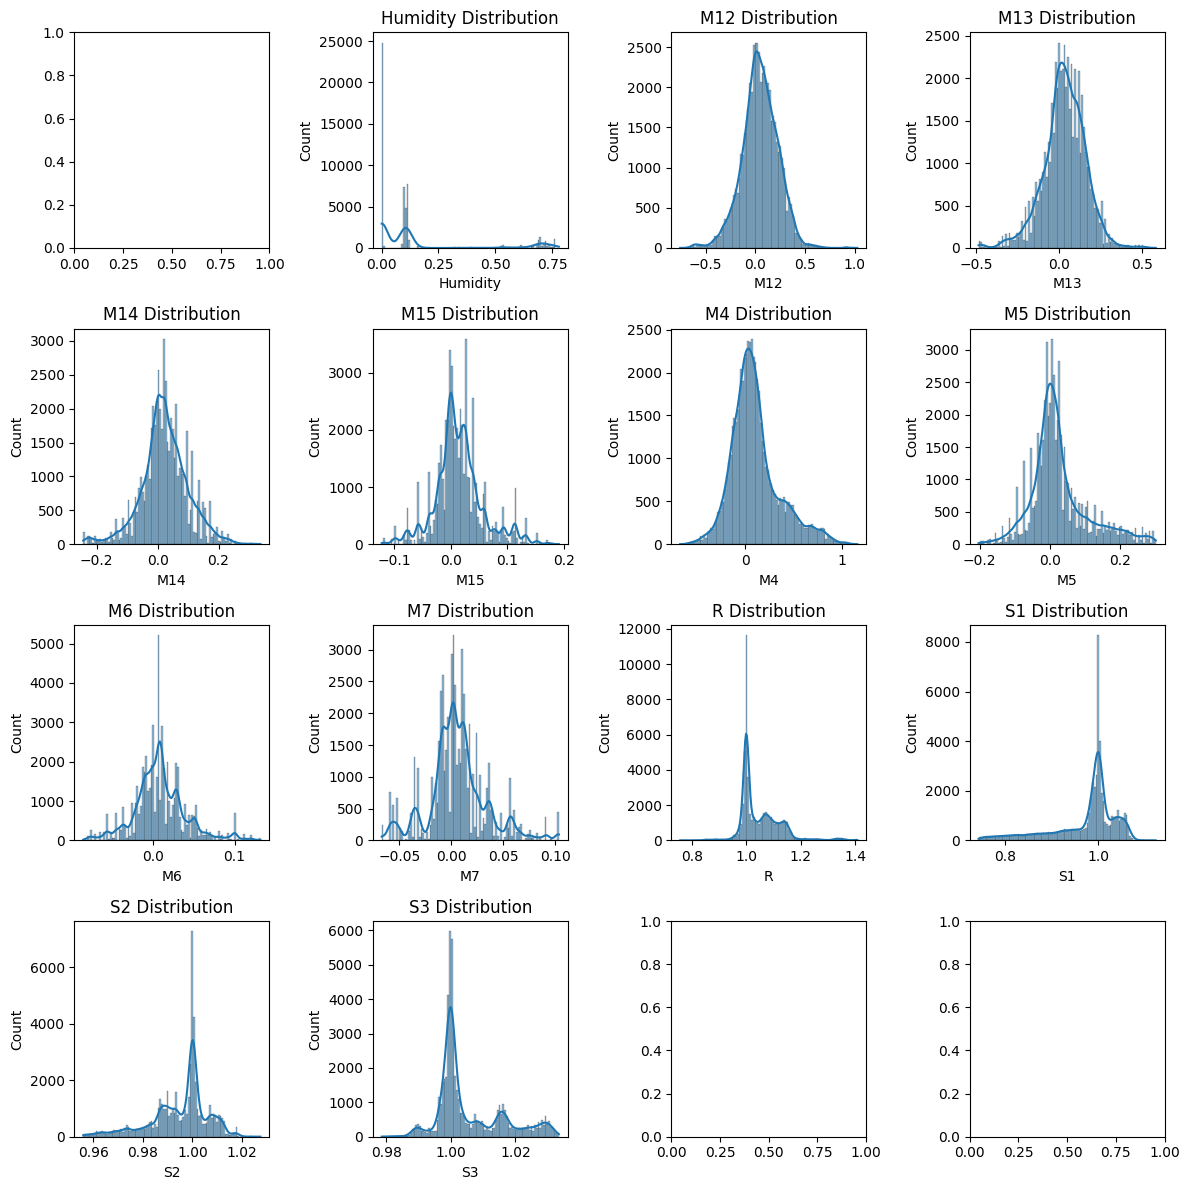

In [14]:
x_train_no_out = remove_outliers_iqr(train_features, train_features.columns[1:])
plot_feature_distributions(x_train_no_out, bins=100, figsize=(12, 12))

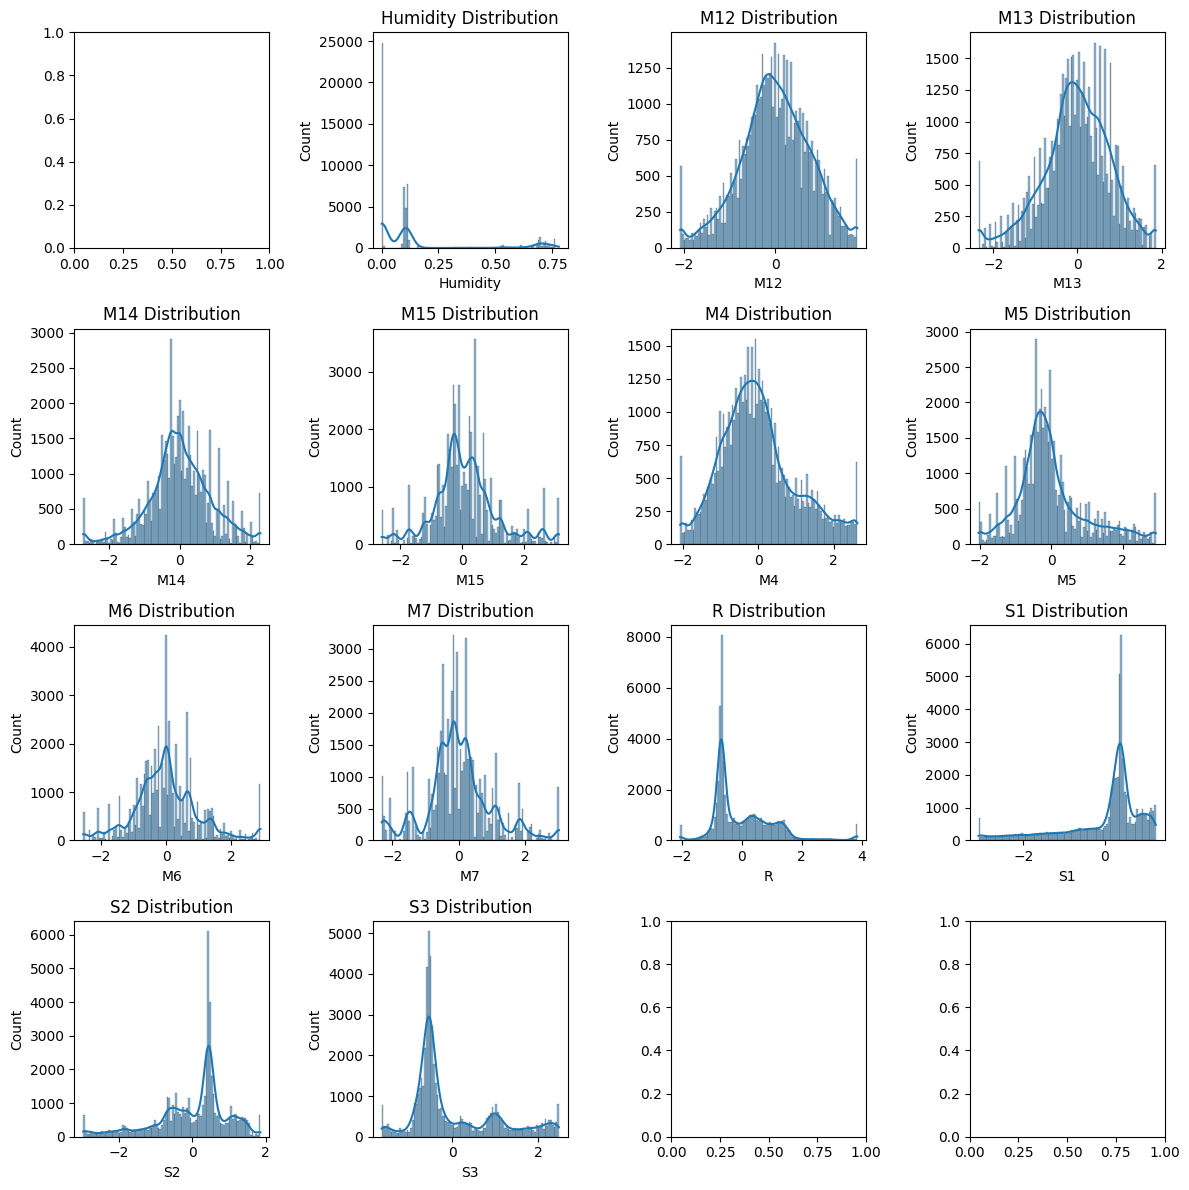

In [16]:
# no outliers and scaled
x_train_no_out_scaled = preprocess_data_2(x_train_no_out)
plot_feature_distributions(x_train_no_out_scaled, bins=100, figsize=(12, 12))

L’analyse des corrélations entre les caractéristiques et les cibles ainsi qu’entre les caractéristiques elles-mêmes permet de mieux comprendre la structure des données et les relations entre les capteurs. En tenant compte du fait que les capteurs M4-M7 et M12-M15 sont physiquement proches les uns des autres, nous pouvons affiner notre interprétation.

---

## Corrélations entre caractéristiques et cibles  

### a. Observations générales
- **Humidité (Humidity) :** 
  - L’humidité présente des **corrélations faibles** avec toutes les cibles (entre -0,05 et 0,27).  
  - Cela suggère que son effet sur les niveaux d’alarme est indirect ou qu’il influence les capteurs plutôt que les mesures elles-mêmes.  
  - Une modélisation avancée pourrait être nécessaire pour capter son impact réel.

- **Groupe M12-M15 :**  
  - Ces capteurs sont **fortement corrélés aux cibles**, avec des valeurs notables comme **-0,38 entre M12 et c01** ou **0,18 entre M12 et c05**.  
  - Comme ils sont proches physiquement, ils capturent probablement des signaux similaires et peuvent être **redondants dans la modélisation**.  
  - L'utilisation de méthodes de réduction de dimensionnalité pourrait être bénéfique.

- **Groupe M4-M7 :**  
  - M4 présente des **corrélations positives significatives** avec plusieurs cibles (par ex. **0,36 avec c03 et c04**), ce qui en fait un capteur important.  
  - Les capteurs M5, M6 et M7 ont des corrélations similaires, mais légèrement plus faibles.  
  - Cela signifie que **ces capteurs apportent une information pertinente mais redondante**, ce qui devra être pris en compte lors du prétraitement des données.

- **Capteurs complémentaires (R, S1, S2, S3) :**  
  - **R montre peu de corrélations** avec les cibles, sauf une valeur notable de **0,36 avec c05**.  
  - **S1 se distingue par des corrélations fortes** : **-0,41 avec c03 et c04**, et **0,36 avec c05**, ce qui en fait une caractéristique importante.  
  - **S2 et S3 ont des corrélations faibles à modérées**, suggérant qu’ils capturent des informations différentes des autres capteurs et pourraient être complémentaires.

### b. Problème spécifique de c15
- **La cible c15 est entièrement constituée de zéros.**  
  - Il n’existe **aucune variation** dans cette variable, ce qui explique pourquoi elle ne présente aucune corrélation avec les capteurs.  
  - Il est probable que **c15 soit une classe non applicable ou redondante**, et elle devrait être exclue de la modélisation.

---

## Corrélations entre les caractéristiques

### a. Fortes corrélations au sein des groupes de capteurs
- **Groupe M12-M15 :**  
  - Ces capteurs ont des corrélations **extrêmement élevées** entre eux (souvent **supérieures à 0,9**).  
  - Cela confirme qu’ils captent **une information quasi identique**, en raison de leur proximité physique.  
  - Il serait pertinent de **réduire la redondance** via une sélection de variables ou une transformation (ex. analyse en composantes principales - PCA).

- **Groupe M4-M7 :**  
  - Ici aussi, les corrélations sont **très fortes entre M4, M5, M6 et M7** (entre **0,89 et 0,98**).  
  - Cela signifie que, **bien que ces capteurs soient informatifs, il n’est pas nécessaire d’utiliser toutes ces variables simultanément**.  
  - Une technique de réduction de dimension pourrait être appliquée pour éviter d’alourdir le modèle.

### b. Corrélations modérées avec d’autres capteurs
- **Capteurs complémentaires (R, S1, S2, S3) :**  
  - **S1 et R sont corrélés positivement** (0,68), ce qui peut suggérer une influence commune.  
  - **S2 et S3 montrent peu de corrélations avec les autres capteurs**, ce qui indique qu’ils fournissent une **information unique**, potentiellement utile pour la modélisation.

- **Impact limité de l’ID et de l’humidité :**  
  - L’**ID ne présente aucune corrélation** significative avec les capteurs et doit être ignoré dans la modélisation.  
  - L’**humidité montre des corrélations faibles** avec les capteurs, mais elle pourrait **avoir un effet indirect non linéaire**.

---

## Implications pour la modélisation

### a. Sélection et transformation des caractéristiques
- **Réduction de dimensionnalité :**  
  - Étant donné les fortes corrélations entre **M12-M15 et M4-M7**, une **analyse en composantes principales (PCA) ou une sélection de variables** peut être envisagée pour éviter la redondance.  
  - **Une approche basée sur l’importance des variables (ex. sélection avec Random Forest ou LASSO)** pourrait aussi permettre d’identifier les capteurs les plus pertinents.

- **Exclusion de c15 :**  
  - Comme cette variable ne varie pas, elle est inutile et peut être retirée sans impact sur la qualité du modèle.

### b. Stratégie pour l’humidité et les capteurs complémentaires
- **Humidité :**  
  - Son effet sur les mesures des capteurs pourrait être non linéaire, justifiant l’utilisation d’**interactions ou de modèles plus complexes (réseaux neuronaux, boosting)**.  

- **Capteurs complémentaires (S1, S2, S3) :**  
  - **S1 montre des corrélations notables avec plusieurs cibles**, ce qui signifie qu’il doit être **inclus dans la modélisation**.  
  - **S2 et S3 fournissent des informations distinctes**, ils pourraient être utiles pour affiner la détection des signaux faibles.

### c. Approche pour la gestion des interactions
- La relation entre les capteurs et les niveaux d’alarme pourrait **ne pas être strictement linéaire**.  
- **L'utilisation de modèles avancés comme XGBoost, LightGBM ou des réseaux neuronaux pourrait permettre de mieux capter ces interactions.**  
- Une **ingénierie des caractéristiques** (feature engineering) pourrait également améliorer la prédiction (ex. interactions entre l’humidité et certains capteurs).

---

## 4. Conclusion : Stratégie
1. **Exclure la variable c15** car elle est entièrement nulle.
2. **Réduire la redondance dans les groupes M12-M15 et M4-M7** via ACP.
3. **Inclure les capteurs complémentaires S1, S2 et S3**, qui semblent apporter des informations uniques.
4. **Explorer l’impact indirect de l’humidité** via des modèles non linéaires ou des interactions.
5. **Utiliser un modèle robuste (XGBoost, LightGBM, réseaux neuronaux)** capable de capter les relations complexes entre les capteurs et les cibles.

Cette approche permettrait d’améliorer la précision de la détection des gaz toxiques tout en optimisant la simplicité et l’efficacité du modèle.
